# Naive Bayes Classification 
A Naive Bayes classifier is a probabilistic machine learning model that’s used for classification task.Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.It is mainly used in text classification that includes a high-dimensional training dataset. It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.

### Why is it called Naïve Bayes?
The Naïve Bayes algorithm is comprised of two words Naïve and Bayes, Which can be described as:

Naïve: It is called Naïve because it assumes that the occurrence of a certain feature is independent of the occurrence of other features. Such as if the fruit is identified on the bases of color, shape, and taste, then red, spherical, and sweet fruit is recognized as an apple. Hence each feature individually contributes to identify that it is an apple without depending on each other.

Bayes: It is called Bayes because it depends on the principle of Bayes' Theorem.Bayes' theorem is also known as Bayes' Rule or Bayes' law, which is used to determine the probability of a hypothesis with prior knowledge. It depends on the conditional probability.
The formula for Bayes' theorem is given as:
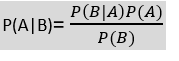
* P(A|B) is Posterior probability: Probability of hypothesis A on the observed event B.
* P(B|A) is Likelihood probability: Probability of the evidence given that the probability of a hypothesis is true.
* P(A) is Prior Probability: Probability of hypothesis before observing the evidence.
* P(B) is Marginal Probability: Probability of Evidence.
After calculating the posterior probability for a number of different hypotheses, you can select the hypothesis with the highest probability.

## Naive Bayes Classifier
Naive Bayes is a classification algorithm for binary (two-class) and multi-class classification problems.Rather than attempting to calculate the values of each attribute value P(d1, d2, d3|h), they are assumed to be conditionally independent given the target value and calculated as P(d1|h) * P(d2|H) and so on.This is a very strong assumption that is most unlikely in real data, i.e. that the attributes do not interact. Nevertheless, the approach performs surprisingly well on data where this assumption does not hold.

* Naive Bayes assumes that all features are independent or unrelated, so it cannot learn the relationship between features.

### Applications of Naïve Bayes Classifier:
* It is used for Credit Scoring.
* It is used in medical data classification.
* It can be used in real-time predictions because Naïve Bayes Classifier is an eager learner.
* It is used in Text classification such as Spam filtering and Sentiment analysis.

###  Types of Naïve Bayes Model:
There are three types of Naive Bayes Model, which are given below:

* Gaussian: The Gaussian model assumes that features follow a normal distribution. This means if predictors take continuous values instead of discrete, then the model assumes that these values are sampled from the Gaussian distribution.
* Multinomial: The Multinomial Naïve Bayes classifier is used when the data is multinomial distributed. It is primarily used for document classification problems, it means a particular document belongs to which category such as Sports, Politics, education, etc.The classifier uses the frequency of words for the predictors.
* Bernoulli: The Bernoulli classifier works similar to the Multinomial classifier, but the predictor variables are the independent Booleans variables. Such as if a particular word is present or not in a document. This model is also famous for document classification tasks.

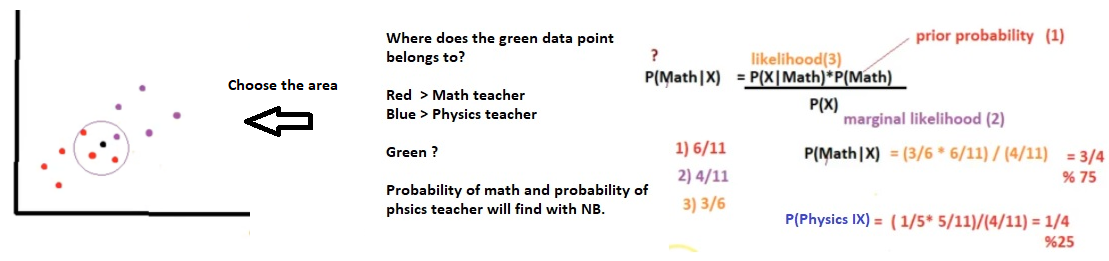
* X axis = Experience 
* Y axis = Salary
* Red dots are math teachers
* Purples are physics teachers
And we would like to find the black dot with Naive Bayes Model. 
We have a simple probability formula for that. 
You have to choose the area firstly ( it is little bit complicated math, let's not think about it right now )
And then just use the formula.

In [2]:
# import data and libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data=pd.read_csv("data.csv")
# What kind of tumor is that? 
# A tumor develops when cells reproduce too quickly.
# Tumors can vary in size from a tiny nodule to a large mass, depending on the type, 
# and they can appear almost anywhere on the body.
# There are two main types of tumor:
# Benign: These are not cancerous. They either cannot spread or grow, or they do so very slowly.           = B
# Malignant: Malignant tumors are cancerous. The cells can grow and spread to other parts of the body.     = M

# Clean the dataset
data.drop(["Unnamed: 32", "id"],axis=1,inplace=True) # axis : all column, inplace=save in data

# x=features y=label(class)
data.diagnosis = [0 if each == "B" else 1 for each in data.diagnosis ]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1) #the rest of them are my features 

# normalization
# High values of data may override other properties and disrupt this model.
# We will scale all features to 0 - 1 
x = (x_data - np.min(x_data)) / (np.max(x_data) -  np.min(x_data)).values


C:\Users\recep.balibey\Anaconda3\lib\site-packages\pandas\core\ops\array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


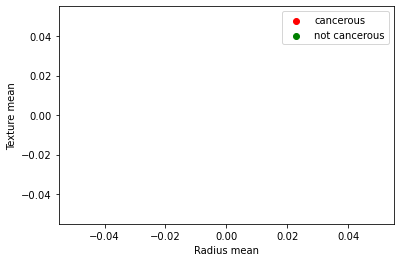

In [3]:
M = data[data.diagnosis == "M"]
B = data[data.diagnosis == "B"]

# Visualization of data
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="cancerous")
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="not cancerous")
plt.xlabel("Radius mean")
plt.ylabel("Texture mean")
plt.legend()
plt.show()

In [4]:
# Dataset train - test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42) # divide randomly but I will run this code many time
# To keep accuracy, I set to 42, same random way it will divide

In [5]:
#  Fitting Naive Bayes to the Training Set:
from sklearn.naive_bayes import GaussianNB  
nb = GaussianNB()  
nb.fit(x_train, y_train)

GaussianNB()

In [6]:
# Prediction of the test set result:
y_pred = nb.predict(x_test)  

In [8]:
#Creating Confusion Matrix:
#Now we will check the accuracy of the Naive Bayes classifier using the Confusion matrix.
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred)  

In [9]:
cm

array([[103,   5],
       [  6,  57]], dtype=int64)

In [10]:
# Confusion matrix output, there are 6+5= 11 incorrect predictions, and 103+57=158 correct predictions.

In [11]:
print("Accuracy of naive  bayes algorithm : ",nb.score(x_test,y_test))

Accuracy of naive  bayes algorithm :  0.935672514619883
